# Guide: quelques étapes pour programmer un perceptron


## Préliminaire: charger des images en Python et les mettre sous forme de vecteur

### Les images

Avec votre éditeur d'images préféré, vous pouvez créer une image et la sauvegarder sous un certain format, c'est à dire une manière d'encoder l'image. Ici on prendra l'exemple du format **.png**

Lorsque que vous sauvegardez, faites-attention au nombre de pixels de l'image, on veut ici des images qui ont toutes la meme taille (dans notre exemple 50x50).

Voici un exemple d'image:
![Un A en noir sur blanc d'une taille 50x50 pixels](training_set_perceptron/A1.png "Logo Title Text 1")


Vous trouverez 8 exemples d'images dans le dossier [training_set_perceptron](training_set_perceptron), que vous pouvez télécharger. Je vous encourage à créer les votres.

### Chargement des packages préalables

In [3]:
from pylab import * #Pour tranformer python en une calculette scientifique
from scipy import misc #Pour lire les images

### Chargement des images dans python


In [9]:
def cv_image_vers_vecteur(image): #Pour convertir une image en vecteur, cela servira pour les opérations suivantes
    return ravel(image)

def charge_l_image(nom_de_fichier):
    return misc.imread(nom_de_fichier, flatten=True, mode = "L")/255. #avec cela on convertit l'image en suite de 0 et de 1

def charge_l_image_sous_forme_de_vecteur(nom_de_fichier):
    return cv_image_vers_vecteur(charge_l_image(nom_de_fichier))

def charge_l_image_et_trace(nom_de_fichier_complet):
    imshow(charge_l_image(nom_de_fichier_complet))
    show()


In [5]:
charge_l_image("training_set_perceptron/A1.png")

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32)

In [11]:
shape(charge_l_image("training_set_perceptron/A1.png"))

(50, 50)

On voit qu'une image est constituée de 50x50 = 2500 valeurs qui peuvent etre égales à 0 ou à 1.

In [12]:
charge_l_image_sous_forme_de_vecteur("training_set_perceptron/A1.png")

array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32)

In [13]:
shape(charge_l_image_sous_forme_de_vecteur("training_set_perceptron/A1.png"))

(2500,)

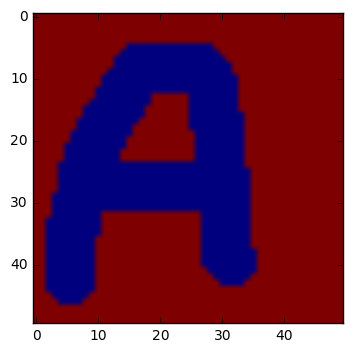

In [10]:
charge_l_image_et_trace("training_set_perceptron/A1.png")

## Suite: liste des étapes pour programmer le perceptron:

1. Constituer un **ensemble d'entrainement** qui contient des exemples et ce qui doit etre appris sur ces exemples. Dans le cas que je vous propose, ce serait tous les A avec le score +1 et tous les B avec le score -1. Encore une fois, n'hésitez pas à faire vos propres exemples.  
1. **Traitement de l'image par le neurone**
Le neurone prend l'image sous la forme d'un vecteur en entrée, le multiplie par ses poids et regarde le signe du résultat.
L'image d'entrée est bicolore, formée de 50 pixels. On peut donc représenter l'image par des 0 et des 1 pour chacune des couleurs, on peut la transformer en un vecteur de taille 2500 contenant des 0 et des 1.
Si on appelle xi le vecteur de l'exemple, wi les poids du neurone, et $y$ le résultat du traitement, alors le traitement de l'image par le neurone peut s'écrire en équations:
<img src="eq1.png" width="200">
1.  **Entrainement du neurone**
On rappelle les étapes principales:
    - On commence par choisir des poids initiaux au hasard (ou bien tous à 0, qu'est-ce qui vous parait le plus cohérent ?) 
    - Pour chaque exemple de notre ensemble d'entrainement:
        - on calcule le score prédit étant donné les poids actuels, le score qu'on aurait du trouver et l'erreur qui est la différence entre ces deux grandeurs
        - On met à jour les poids: nouveaux poids = poids actuels + erreur * entrée, 
    - Et on recommence
Soit en équations:
Si les poids actuels sont wi(t), les poids mis à jour wi(t+1), le score de l'exemple k est sk, la prédiction du neurone yk et l'exemple k vectorisé est sous la forme  xi,k, alors:
<img src="eq2.png" width="200">
Quand s'arreter ?
Un critère peut etre de regarder quand le neurone cesse de progresser, c'est à dire que les erreurs qu'il fait cessent de diminuer.  
1. Une fois le neurone entrainé, on le **teste** sur quelques images